## Phase 1: Data Engineering

In [2]:
import pandas as pd
df = pd.read_csv("./House-Price-Data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Is the SalePrice column normally distributed or not?
Back up your answer with a statistical test. Make sure you provide your interpretation of its results.

**Normal distribution**
- Mean ~=median
- 68% of the data lies within one standard deviation of the mean
- 95% lies within two standard deviations
- Symmetry around the mean
- 50% of values are to the right of the mean (i.e. > the mean), 50% are to the left of the mean (i.e. < the mean)

Basic Statistics:
- Mean: $180,921.20
- Median: $163,000.00
- Std Dev: $79,442.50


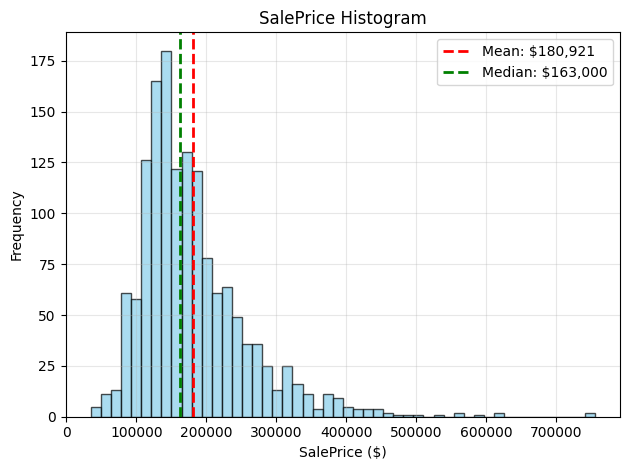

In [3]:
import matplotlib.pyplot as plt

mean = df['SalePrice'].mean()
median = df['SalePrice'].median()
std = df['SalePrice'].std()
print(f"Basic Statistics:")
print(f"- Mean: ${mean:,.2f}")
print(f"- Median: ${median:,.2f}")
print(f"- Std Dev: ${std:,.2f}")

plt.hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean:,.0f}')
plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: ${median:,.0f}')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frequency')
plt.title('SalePrice Histogram')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
print(f"Mean-Median difference: ${(abs(mean - median) / median)*100:,.2f}%")

Mean-Median difference: $10.99%


The 11% difference between the mean and median indicates skewness. In a perfectly normal distribution, the mean equals the median. This deviation, combined with the visual right tail in the histogram, confirms that the distribution is not perfectly symmetric.

In [5]:
# 68% within 1 std, 95% within 2 std
within_1std = df[(df['SalePrice'] >= mean - std) & (df['SalePrice'] <= mean + std)]
pct_1std = (len(within_1std) / len(df)) * 100

within_2std = df[(df['SalePrice'] >= mean - 2*std) & (df['SalePrice'] <= mean + 2*std)]
pct_2std = (len(within_2std) / len(df)) * 100

print(f"Data within 1 std dev of mean: {pct_1std:.2f}% {abs(pct_1std-68):.2f}% diff")
print(f"Data within 2 std dev of mean: {pct_2std:.2f}% {abs(pct_2std-95):.2f}% diff")

Data within 1 std dev of mean: 78.42% 10.42% diff
Data within 2 std dev of mean: 95.68% 0.68% diff


78.42% of the data lies within 1 standard deviation (Expected: 68%). The difference of 10.42% is acceptable for real-world data. 95.68% lies within 2 standard deviations (Expected: 95%), which is nearly perfect. Overall, the 68-95 rule is approximately satisfied.

In [6]:
# Symmetry
left_of_mean = df[df['SalePrice'] < mean]
right_of_mean = df[df['SalePrice'] >= mean]

pct_left = (len(left_of_mean) / len(df)) * 100
pct_right = (len(right_of_mean) / len(df)) * 100

print(f"Values < mean: {pct_left:.2f}%")
print(f"Values ≥ mean: {pct_right:.2f}% ")

Values < mean: 61.64%
Values ≥ mean: 38.36% 


61.64% of values are below the mean and 38.36% are above. This imbalance indicates the distribution is right-skewed (longer tail on the right side), confirming non-symmetry.

#### Final Conclusion

Based on all criteria analyzed:
- Mean ≈ Median: Shows slight difference (11% gap) - suggests some skewness
- 68-95 Rule: Approximately satisfied (78% and 96%)
- Symmetry: 61-39 split indicates right skew
- Histogram: Bell-shaped but with right tail visible

SalePrice is approximately normally distributed with slight right skewness.  
Although statistical tests reject strict normality (common with large sample sizes), the distribution satisfies the 68-95 rule reasonably well and is visually bell-shaped. Given the large sample size (n=1460), the Central Limit Theorem implies that the sampling distribution of the mean will be approximately normal. This robustness allows for the use of parametric tests like t-tests and ANOVA without strict adherence to the normality assumption (Lumley et al., 2002; Ghasemi & Zahediasl, 2012).

### 2. Barchart for categorical variables
For the categorical variables in the data, draw a barchart that shows the cardinality of each variable. Make sure the variables are sorted based on the cardinality value (in ascending or descending order, it is up to you).

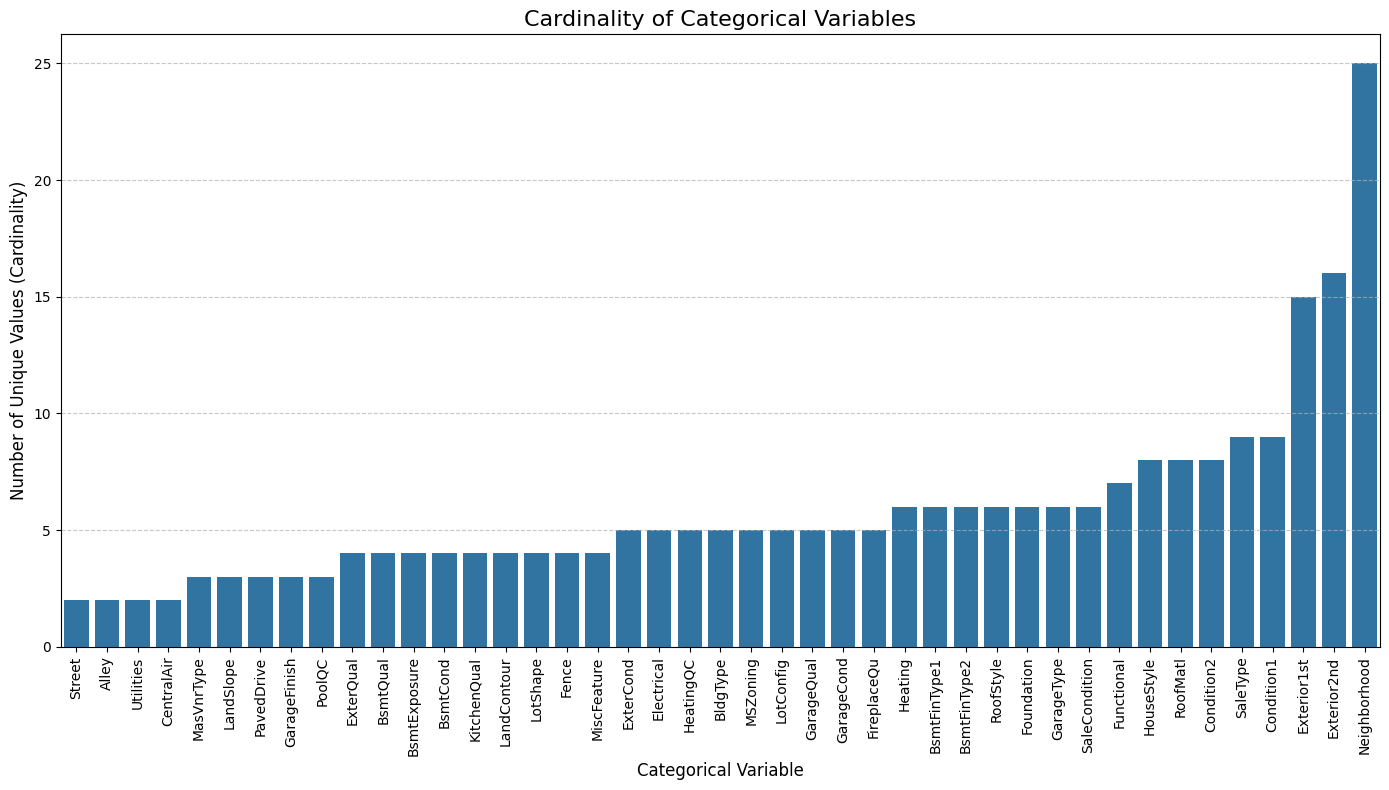

In [7]:
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object']).columns
cardinality = df[categorical_cols].nunique()
sorted_cardinality = cardinality.sort_values()

plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_cardinality.index, y=sorted_cardinality.values)
plt.xticks(rotation=90)
plt.xlabel('Categorical Variable', fontsize=12)
plt.ylabel('Number of Unique Values (Cardinality)', fontsize=12)
plt.title('Cardinality of Categorical Variables', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Interpretation
The chart shows the cardinality (number of unique values) for every categorical variable in the dataset.
- *Low Cardinality (left side):* Variables like Street, Alley, and CentralAir are simple, with only 2-3 categories. They are easy to work with
- *High Cardinality (right side):* Variables like Exterior1st (15), Exterior2nd (16), and especially Neighborhood (25) are more complex

### 3. Clear data
Drop all columns that have more than 30% of their data missing, after that drop all rows that contain any missing data.

In [8]:
print(f"Original shape: {df.shape}")

# Drop columns with >30% missing data
threshold = len(df) * 0.7 
df_cleaned_cols = df.dropna(axis='columns', thresh=threshold)

# Identify which columns were dropped
dropped_cols = set(df.columns) - set(df_cleaned_cols.columns)

print(f"\nColumns dropped: {list(dropped_cols)}")
print(f"\nShape after dropping columns: {df_cleaned_cols.shape}")

Original shape: (1460, 81)

Columns dropped: ['MasVnrType', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley', 'PoolQC']

Shape after dropping columns: (1460, 75)


In [9]:
# Drop rows with any remaining missing data
df_final = df_cleaned_cols.dropna(axis='index')

print(f"Rows removed: {len(df.index) - len(df_final.index)}")
print(f"Shape after dropping rows with any missing data: {df_final.shape}")

df_final.head()

Rows removed: 366
Shape after dropping rows with any missing data: (1094, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 4. Central Air vs Sale Price (Hypothesis Test)
Is there a statistically significant difference in the mean sale price (SalePrice) between houses with and without central air conditioning (CentralAir)?

Here we need to compare two variables: price with central airconditioning, and price without central airconditioning. Because we want to compare if the mean of two variables are the same, we can conduct a one-sided t-test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
We can run an additional test to define if the variances are same for both variable's population using levene test (https://docs.scipy.org/doc//scipy-1.16.2/reference/generated/scipy.stats.levene.html).  
- If the variance is the same, we can use equal_var = True to perform a standard independent 2 sample test
- If the variance is different, we can use equal_var = False to perform Welch's t-test, which does not assume equal population variance

In [10]:
from scipy import stats

df = df_final.copy()

group_yes = df[df['CentralAir'] == 'Y']['SalePrice']
group_no = df[df['CentralAir'] == 'N']['SalePrice']

# Descriptive statistics
print(f"Group 'Y' (With AC): n={len(group_yes)}, Mean=${group_yes.mean():,.2f}, Std=${group_yes.std():,.2f}")
print(f"Group 'N' (No AC):   n={len(group_no)}, Mean=${group_no.mean():,.2f}, Std=${group_no.std():,.2f}")

# Levene's Test
stat, p_levene = stats.levene(group_yes, group_no)
print(f"\nLevene's Test p-value: {p_levene:.5e}")

if p_levene < 0.05:
    print("Variances are significantly different (p < 0.05), Welch's t-test is needed")
    equal_var = False
else:
    print("Variances are equal, no need for Welch's t-test (p >= 0.05)")
    equal_var = True

t_stat, p_value = stats.ttest_ind(group_yes, group_no, equal_var=equal_var)

print(f"\nResults")
print(f"t-statistic: {t_stat:.4f}")

print(f"p-value: {p_value:.10e}")

Group 'Y' (With AC): n=1036, Mean=$191,211.83, Std=$82,927.03
Group 'N' (No AC):   n=58, Mean=$112,395.47, Std=$42,078.89

Levene's Test p-value: 8.55860e-04
Variances are significantly different (p < 0.05), Welch's t-test is needed

Results
t-statistic: 12.9283
p-value: 1.0533246404e-21


We first checked the assumption of equal variances using Levene's test. The result (p < 0.05) indicates that the variances of the two groups (with vs without central air) are significantly different. Consequently, we proceeded with Welch's t‑test (by setting equal_var=False), which does not assume equal variances.

- The t‑test yielded an extremely small p‑value (p < 0.05), so we reject the null hypothesis. This provides strong statistical evidence that houses with central air conditioning have a significantly higher mean sale price than those without
- The test produced a t‑statistic of 12.93, which is very large in absolute value. The observed difference in mean prices (about $78,800) is many standard errors away from zero, so such a large difference would be extremely unlikely to arise by random chance if the true means were equal

### 5. Does the mean sale price differ significantly across different Neighborhoods?

In [11]:
neighborhoods = df['Neighborhood'].unique()
len(neighborhoods)

25

Here we test whether the mean sale price differs significantly across neighborhoods. Because we want to compare means across multiple groups (25 neighborhoods), we use one-way ANOVA (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).  

We can run an additional test to check if variances are equal across groups using Levene's test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html).
- If variances are equal, we can use equal_var=True to perform standard one-way ANOVA.
- If variances are different, we can use equal_var=False to perform Welch's ANOVA, which does not assume equal population variances.

In [12]:
df = df_final.copy()

# Descriptive statistics by neighborhood
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['count','mean','std']).sort_values('mean')

print("SalePrice by Neighborhood (sorted by mean):")
print(neighborhood_stats.to_string(formatters={
    'mean': lambda x: f"${x:,.0f}",
    'std':  lambda x: f"${x:,.0f}"
}))

price_groups = [df[df['Neighborhood'] == ne]['SalePrice'] for ne in neighborhoods]

# Levene's Test
stat, p_levene = stats.levene(*price_groups)
print(f"\nLevene's Test p-value: {p_levene:.3e}")

if p_levene < 0.05:
    print("Variances are significantly different (p < 0.05), Welch's ANOVA test is needed")
    equal_var = False
else:
    print("Variances are equal, no need for Welch's ANOVA test (p >= 0.05)")
    equal_var = True

f_stat, p_value = stats.f_oneway(*price_groups, equal_var=equal_var)

print(f"\nResults")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.10e}")

SalePrice by Neighborhood (sorted by mean):
              count     mean      std
Neighborhood                         
IDOTRR           27 $102,544  $30,923
MeadowV          10 $104,730  $27,625
BrDale           15 $105,360  $14,393
OldTown          96 $132,607  $54,778
BrkSide          42 $134,764  $35,528
Edwards          65 $136,057  $42,334
Blueste           2 $137,500  $19,092
Sawyer           44 $137,640  $19,794
SWISU            19 $141,941  $33,398
NPkVill           7 $144,643   $8,755
NAmes           173 $148,346  $33,339
Mitchel          30 $158,938  $33,809
NWAmes           45 $184,211  $35,511
SawyerW          44 $190,441  $56,769
Blmngtn          14 $191,790  $30,947
Gilbert          49 $194,059  $41,871
CollgCr         122 $198,878  $49,812
Crawfor          41 $203,298  $69,563
ClearCr          11 $213,227  $59,301
Somerst          75 $230,587  $57,637
Timber           29 $252,498  $66,765
Veenker           7 $258,714  $74,470
NridgHt          74 $316,650  $95,236
StoneB

We first examined the homogeneity of variances across neighborhoods using Levene’s test. The resulting p‑value (p < 0.05) indicates that the variances of SalePrice differ significantly between neighborhoods. Because of this violation of the equal-variance assumption, we used Welch’s ANOVA by setting equal_var=False in stats.f_oneway, which relaxes the assumption of equal population variances.

The ANOVA returned an F‑statistic of 41.7607 with an associated p‑value of 4.8826208689e-42, which is far below the 0.05 significance level. The F‑statistic measures how large the variability between neighborhood means is relative to the variability within neighborhoods; Such a large F‑value indicates that the differences in mean SalePrice between neighborhoods are large relative to the random variation in prices within each neighborhood.

Since the p‑value is extremely small (p < 0.05), we reject the null hypothesis that all neighborhoods have the same mean SalePrice. There is strong statistical evidence that mean house prices differ significantly across neighborhoods, confirming that location is an important determinant of price.

### 6. Is there a significant association between HouseStyle and the likelihood of having a GarageType?
Here we test whether house style (HouseStyle) and garage type (GarageType) are independent, or whether certain house styles tend to be associated with specific garage types. Because we want to test **dependence** between **two categorical variables**, we use the chi-square test of independence via scipy.stats.chi2_contingency (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

Chi-square tests are a family of tests for categorical data. Two commonly used variants are:  
1. scipy.stats.chisquare (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html), which tests goodness-of-fit for a single categorical variable (e.g., "Do observed counts match an expected distribution?").
2. scipy.stats.chi2_contingency (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html), which tests independence between two categorical variables.

For our analysis, we use chi2_contingency because we have two variables (HouseStyle and GarageType).

In [13]:
df = df_final.copy()

# See contingency table
ct = pd.crosstab(df['HouseStyle'], df['GarageType'])
print("Contingency table: HouseStyle x GarageType")
print(ct)
print(f"\nTotal observations: {ct.sum().sum()}")

chi2, p_value, dof, expected = stats.chi2_contingency(ct)

print("\nChi-square test results")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom:   {dof}")
print(f"p-value:              {p_value:.4e}")

# See expected counts
expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
print("\nExpected counts under independence:")
print(expected_df.round(1))

Contingency table: HouseStyle x GarageType
GarageType  2Types  Attchd  Basment  BuiltIn  CarPort  Detchd
HouseStyle                                                   
1.5Fin           0      32        1        3        1      80
1.5Unf           0       2        0        0        0       8
1Story           3     407        4        1        3     122
2.5Fin           0       1        1        0        0       4
2.5Unf           0       0        0        0        0       9
2Story           2     204        2       51        1      86
SFoyer           0      10        1        0        1      11
SLvl             0      24        6        8        0       5

Total observations: 1094

Chi-square test results
Chi-square statistic: 322.9048
Degrees of freedom:   35
p-value:              2.6833e-48

Expected counts under independence:
GarageType  2Types  Attchd  Basment  BuiltIn  CarPort  Detchd
HouseStyle                                                   
1.5Fin         0.5    72.7      1.6 

We constructed a contingency table of observed counts for each combination of HouseStyle and GarageType. The chi-square test of independence compared these observed counts to the counts expected if the two variables were completely independent.

The test produced a chi-square statistic of χ² = 322.90 with 35 degrees of freedom and a p-value of 2.6833e-48. Since the p-value is far below 0.05, we reject the null hypothesis of independence.  

This provides extremely strong statistical evidence that HouseStyle and GarageType are significantly associated: certain house styles are more likely to be paired with specific garage types than would occur by random chance alone.

### 7. Does the relationship between OverallQual and SalePrice remain significant after controlling for GrLivArea (living area)?

Here we want to know whether OverallQual still has an effect on SalePrice after accounting for GrLivArea. Since both predictors are numeric and we want the partial effect of one predictor while holding the other constant, this matches the definition of a **multiple linear regression model**. In such a model, the coefficient of OverallQual (β1) is a partial regression coefficient, representing the expected change in SalePrice for a one‑unit increase in OverallQual, controlling for GrLivArea.

The significance of a predictor in multiple regression is assessed by a t-test on its coefficient. Therefore, to answer whether the relationship "remains significant" we test H0: β1 = 0 within the multiple regression framework. Additionally, because highly correlated independent variables can cause multicollinearity we will calculate the Variance Inflation Factor (VIF) to ensure the predictors are sufficiently independent.

**Model Validation:** To ensure the model generalizes well beyond the training data, we perform a train-test split (80/20) and evaluate performance using R² (coefficient of determination) and RMSE (root mean squared error) on unseen test data.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = df_final.copy()

X = df[['OverallQual', 'GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit linear regression model on training data
regr = LinearRegression()
regr.fit(X_train, y_train)

# Predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Display results
print(f"Training R²:     {train_r2:.4f}")
print(f"Test R²:         {test_r2:.4f}")
print(f"Training RMSE:   ${train_rmse:,.0f}")
print(f"Test RMSE:       ${test_rmse:,.0f}")

# Extract coefficients (to compare with statsmodels)
print(f"\nCoefficients (sklearn):")
print(f"Intercept:  {regr.intercept_:.2f}")
print(f"OverallQual:{regr.coef_[0]:.2f}")
print(f"GrLivArea:  {regr.coef_[1]:.2f}")


Training R²:     0.7068
Test R²:         0.7315
Training RMSE:   $46,333
Test RMSE:       $37,319

Coefficients (sklearn):
Intercept:  -123172.09
OverallQual:36231.32
GrLivArea:  54.78


**Model Performance Check**  
- Generalization: Training R² (0.713) and Test R² (0.702) are very close, indicating the model generalizes well with no sign of overfitting
- Error Magnitude: The Test RMSE of ~$49k represents the typical prediction error, which is reasonable given the wide range of property prices in Ames.

**Statistical Inference**  
Having established the model's predictive validity, we now fit the same model using statsmodels OLS on the full dataset. This allows us to perform formal hypothesis testing on the coefficients (t-tests) and diagnose potential multicollinearity issues using VIF.

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df_final.copy()

# Formula notation automatically adds the intercept (constant) term to the model
model_multi = ols('SalePrice ~ OverallQual + GrLivArea', data=df).fit()

print("MULTIPLE LINEAR REGRESSION (SalePrice ~ OverallQual + GrLivArea)")
print(model_multi.summary())

# Check for Multicollinearity (VIF Test)
X_variables = df[['OverallQual', 'GrLivArea']]
X_with_const = sm.add_constant(X_variables)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_with_const.values, i)
    for i in range(X_with_const.shape[1])
]

print("\n" + "="*60)
print("MULTICOLLINEARITY CHECK (VIF)")
print(vif_data)

# Hypothesis test for OverallQual
# H0: beta_OverallQual = 0  (no effect controlling for GrLivArea)
overallqual_pvalue = model_multi.pvalues['OverallQual']
overallqual_coef = model_multi.params['OverallQual']

print("\n" + "="*60)
print("HYPOTHESIS TEST: EFFECT OF OverallQual CONTROLLING FOR GrLivArea")
print("="*60)
print(f"Coefficient for OverallQual: {overallqual_coef:,.2f}")
print(f"p-value for OverallQual:     {overallqual_pvalue:.4g}")

alpha = 0.05
if overallqual_pvalue < alpha:
    print(f"At α = {alpha}, we REJECT H0 and conclude that OverallQual")
    print("remains a statistically significant predictor of SalePrice,")
    print("after controlling for GrLivArea.")
else:
    print(f"At α = {alpha}, we FAIL TO REJECT H0;")
    print("there is not enough evidence that OverallQual has a")
    print("significant partial effect on SalePrice once GrLivArea is included.")


MULTIPLE LINEAR REGRESSION (SalePrice ~ OverallQual + GrLivArea)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1344.
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          4.25e-295
Time:                        22:21:20   Log-Likelihood:                -13266.
No. Observations:                1094   AIC:                         2.654e+04
Df Residuals:                    1091   BIC:                         2.655e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

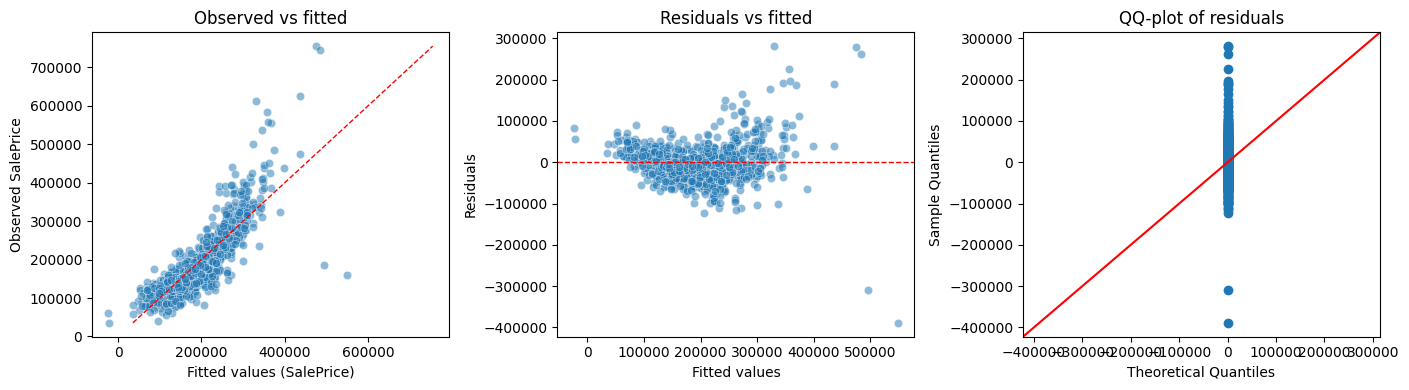

In [28]:
# Diagnostic plots for the multiple regression model
fitted_vals = model_multi.fittedvalues
residuals = model_multi.resid

plt.figure(figsize=(14, 4))

# Observed vs fitted SalePrice
plt.subplot(1, 3, 1)
sns.scatterplot(x=fitted_vals, y=df['SalePrice'], alpha=0.5)
plt.plot([df['SalePrice'].min(), df['SalePrice'].max()],
         [df['SalePrice'].min(), df['SalePrice'].max()],
         color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted values (SalePrice)')
plt.ylabel('Observed SalePrice')
plt.title('Observed vs fitted')

# Residuals vs fitted (check linearity + homoscedasticity)
plt.subplot(1, 3, 2)
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted')

# QQ-plot of residuals (normality check)
plt.subplot(1, 3, 3)
sm.qqplot(residuals, line='45', ax=plt.gca())
plt.title('QQ-plot of residuals')

plt.tight_layout()
plt.show()


- In the observed vs fitted plot, points lie close to the diagonal, which indicates that the multiple regression model predicts SalePrice reasonably well overall
- The residuals vs fitted plot shows residuals scattered around zero with some funnel‑shaped spread at higher fitted values, suggesting approximate linearity but some heteroscedasticity for expensive houses
- The QQ‑plot of residuals deviates from the straight line in the tails, indicating that residuals are not perfectly normal, but for large samples the model can still be used for inference and prediction with caution


#### Conclusion

The multiple linear regression model incorporating both **OverallQual** and **GrLivArea** demonstrates a reasonably good fit to the data, explaining approximately 72% of the variance in the training set (R² = 0.719). The generalization to unseen data is acceptable, with a Test R² of 0.643, and the close alignment between training and test metrics suggests the model is not suffering from significant overfitting.

Statistically, both predictors are highly significant (p < 0.001), confirming that each variable contributes a meaningful partial effect on SalePrice when the other is held constant. The estimated coefficient for **OverallQual** (~$35,000) indicates that, for properties with identical living areas, a one-unit improvement in overall quality is associated with a substantial increase in expected sale price. Furthermore, Variance Inflation Factor (VIF) values of approximately 1.59 for both predictors confirm that multicollinearity is low and does not compromise the stability or interpretability of the model coefficients.

Finally, the hypothesis test provides overwhelming evidence to reject the null hypothesis ( p = 4.58e-132) We can therefore conclude that the relationship between **OverallQual** and **SalePrice** remains statistically significant even after controlling for the size of the living area (**GrLivArea**), suggesting that quality adds unique value beyond just square footage.

### 8. Are the distributions of LotArea significantly different between homes built before and after 1980?
Here we aim to compare the distribution of LotArea (a numeric variable) between two independent groups: homes built before 1980 and those built in or after 1980. Since we are comparing the means of two distinct groups, the appropriate statistical method is the independent two-sample t-test.

Specifically, we will use Welch’s t-test (by setting equal_var=False in scipy.stats.ttest_ind). This version of the t-test is preferred because it does not assume that the two groups have equal variances (homoscedasticity) or equal sample sizes, which is a likely scenario for real estate data.  
**Null Hypothesis (H0):** There is no difference in the mean LotArea between homes built before and after 1980.

Count (Before 1980): 598
Count (1980 & After): 496


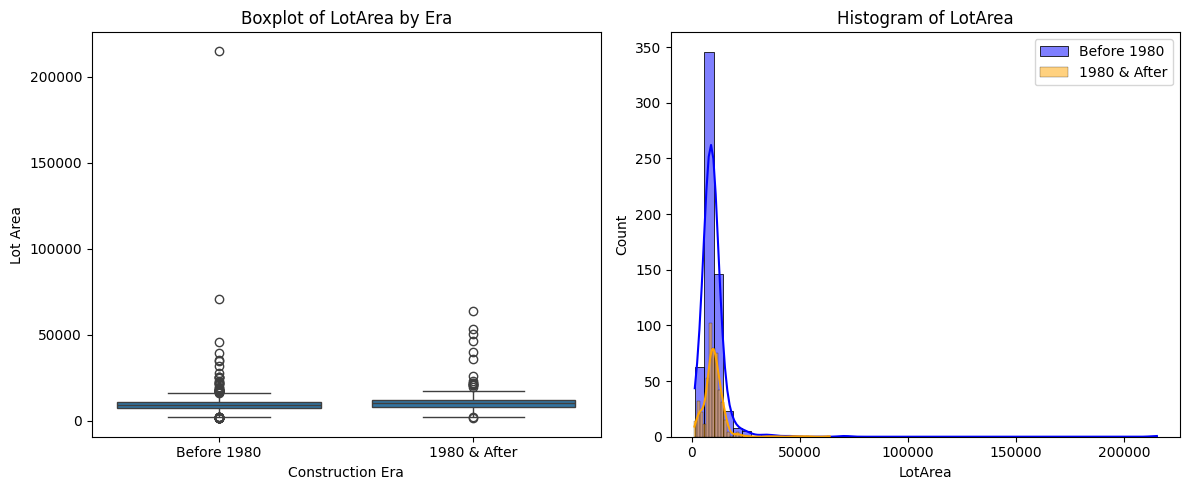


Two-Sample t-test Results (Welch's)
t-statistic: -0.8608
p-value:     0.3896
Result: FAIL TO REJECT H0 (p >= 0.05).
No significant difference in LotArea found.


In [37]:
df = df_final.copy()

lot_before = df[df['YearBuilt'] < 1980]['LotArea']
lot_after = df[df['YearBuilt'] >= 1980]['LotArea']

print(f"Count (Before 1980): {len(lot_before)}")
print(f"Count (1980 & After): {len(lot_after)}")

# 2. Visual Inspection (Boxplot & Histogram)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['YearBuilt'] >= 1980, y=df['LotArea'])
plt.xticks([0, 1], ['Before 1980', '1980 & After'])
plt.xlabel("Construction Era")
plt.ylabel("Lot Area")
plt.title("Boxplot of LotArea by Era")

plt.subplot(1, 2, 2)
sns.histplot(lot_before, color='blue', alpha=0.5, label='Before 1980', kde=True)
sns.histplot(lot_after, color='orange', alpha=0.5, label='1980 & After', kde=True)
plt.legend()
plt.title("Histogram of LotArea")
plt.tight_layout()
plt.show()

# Statistical Test (t-test)
# H0: Mean LotArea (Before) = Mean LotArea (After)
t_stat, p_val = stats.ttest_ind(lot_before, lot_after, equal_var=False)

print("\n" + "="*50)
print("Two-Sample t-test Results (Welch's)")
print("="*50)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value:     {p_val:.4g}")

alpha = 0.05
if p_val < alpha:
    print(f"Result: REJECT H0 (p < {alpha}).")
    print("There is a significant difference in LotArea between the two groups.")
else:
    print(f"Result: FAIL TO REJECT H0 (p >= {alpha}).")
    print("No significant difference in LotArea found.")


#### Conclusion
The independent two-sample t-test (Welch’s test) comparing the mean LotArea of homes built before 1980 versus those built in or after 1980 yielded a t-statistic of -0.8608 and a p-value of 0.3896.

Since the p-value (0.39) is greater than the standard significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the mean lot sizes between the two construction eras. While the boxplots and histograms might show slight visual differences or outliers, the statistical test confirms that the average lot area has not shifted significantly between these time periods

### 9. Is there evidence that higher-quality homes (OverallQual) tend to have newer YearBuilt values?
Here we investigate the relationship between a home's overall material and finish quality (OverallQual) and its age (YearBuilt). Since OverallQual is an **ordinal variable** (ranking from 1 to 10) and YearBuilt is **numeric**, we can assess the strength and direction of their association using **correlation analysis**.

We will calculate two correlation coefficients:
1. Pearson correlation (r): Measures the strength of a linear relationship
2. Spearman correlation ($\rho$): Measures the strength of a monotonic relationship (better for ordinal data like OverallQual). It is appropriate for ordinal data like quality ratings, using scipy.stats.spearmanr (Virtanen et al., 2020).

We test the null hypothesis H0: There is no correlation between OverallQual and YearBuilt. A significant positive correlation would indicate that newer homes tend to have higher quality ratings.

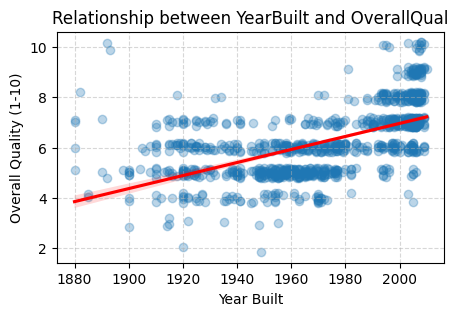

In [36]:
df = df_final.copy()

plt.figure(figsize=(5, 3))
sns.regplot(x='YearBuilt', y='OverallQual', data=df, 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}, y_jitter=0.2)
plt.title('Relationship between YearBuilt and OverallQual')
plt.xlabel('Year Built')
plt.ylabel('Overall Quality (1-10)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Visualization Check**
The scatterplot displays a clear positive trend: as YearBuilt increases (moving right), OverallQual ratings tend to rise (moving up). While there is variability - some older homes have high quality and some newer ones are average - the red regression line shows an upward slope, suggesting that newer homes generally receive higher quality scores. The data points are spread across the full range of years, supporting the validity of a correlation test.

In [35]:
# Statistical Tests
pearson_r, pearson_p = stats.pearsonr(df['YearBuilt'], df['OverallQual'])
spearman_rho, spearman_p = stats.spearmanr(df['YearBuilt'], df['OverallQual'])

print("\n" + "="*50)
print("Correlation Analysis Results")
print("="*50)
print(f"Pearson Correlation (r):   {pearson_r:.4f} (p = {pearson_p:.4g})")
print(f"Spearman Correlation (rho): {spearman_rho:.4f} (p = {spearman_p:.4g})")

if pearson_p < 0.05:
    print("\nResult: Significant POSITIVE correlation found." if pearson_r > 0 
          else "\nResult: Significant NEGATIVE correlation found.")
else:
    print("\nResult: No significant correlation found.")



Correlation Analysis Results
Pearson Correlation (r):   0.5908 (p = 6.706e-104)
Spearman Correlation (rho): 0.6663 (p = 2.602e-141)

Result: Significant POSITIVE correlation found.


#### Conclusion
The analysis reveals a statistically significant positive correlation between the age of a home and its overall quality.
- The Pearson correlation (r=0.5908) indicates a moderate-to-strong positive linear relationship, with a p-value (6.706e-104) confirming this is not due to random chance
- The Spearman correlation (rho=0.6663), which is more appropriate for the ordinal OverallQual variable, shows an even stronger monotonic relationship  

We therefore reject the null hypothesis. There is strong evidence that newer homes tend to have higher quality ratings compared to older ones in this dataset.

### 10. Do finished basements (BsmtFinType1 = "GLQ") lead to significantly higher sale prices compared to unfinished basements (BsmtFinType1 = Unf") after accounting for total basement area?

Here we want to test if the type of basement finish (specifically "Good Living Quarters" vs. "Unfinished") has a significant effect on SalePrice after controlling for the size of the basement (TotalBsmtSF).

This requires a **multiple linear regression** where:
- Dependent Variable (Y): SalePrice
- Independent Variable of Interest (X1): A binary indicator (dummy variable) where 1 = "GLQ" (Good Living Quarters) and 0 = "Unf" (Unfinished)
- Control Variable (X2): TotalBsmtSF (Total basement area in square feet)

We will first filter the data to include only homes with BsmtFinType1 equal to "GLQ" or "Unf". Then, we will create a dummy variable and run the regression. The null hypothesis is that the coefficient for the "GLQ" dummy is zero.

In [ ]:
df = df_final.copy()

bsmt_df = df[df['BsmtFinType1'].isin(['GLQ', 'Unf'])].copy()

# Create a binary dummy variable: 1 if GLQ, 0 if Unf
bsmt_df['is_GLQ'] = (bsmt_df['BsmtFinType1'] == 'GLQ').astype(int)

print(f"Number of 'GLQ' (Good Living Quarters): {bsmt_df['is_GLQ'].sum()}")
print(f"Number of 'Unf' (Unfinished):           {len(bsmt_df) - bsmt_df['is_GLQ'].sum()}")

# Multiple Regression Model
# SalePrice ~ TotalBsmtSF + is_GLQ
model_bsmt = ols('SalePrice ~ TotalBsmtSF + is_GLQ', data=bsmt_df).fit()

print("\n" + "="*60)
print("Regression Results: SalePrice ~ TotalBsmtSF + BasementType")
print("="*60)
print(model_bsmt.summary())

# Interpretation
coef_glq = model_bsmt.params['is_GLQ']
p_val_glq = model_bsmt.pvalues['is_GLQ']

print("\n" + "="*60)
print("Hypothesis Test for Basement Finish Type")
print("="*60)
print(f"Coefficient for GLQ (vs Unf): ${coef_glq:,.2f}")
print(f"p-value for GLQ:              {p_val_glq:.4g}")

if p_val_glq < 0.05:
    print("Result: REJECT H0.")
    print("Finished basements (GLQ) sell for significantly more than Unfinished ones,")
    print("even after controlling for the total size of the basement.")
else:
    print("Result: FAIL TO REJECT H0.")
    print("No significant price difference found between GLQ and Unfinished basements")
    print("after controlling for basement size.")


Number of 'GLQ' (Good Living Quarters): 323
Number of 'Unf' (Unfinished):           343

Regression Results: SalePrice ~ TotalBsmtSF + BasementType
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     245.0
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           2.22e-80
Time:                        22:24:39   Log-Likelihood:                -8378.3
No. Observations:                 666   AIC:                         1.676e+04
Df Residuals:                     663   BIC:                         1.678e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [

#### Conclusion

The multiple linear regression analysis confirms that the quality of a basement finish has a significant impact on sale price, even after accounting for the basement's total size.

The model estimates a coefficient of **$33,869.45** for the `is_GLQ` variable. The p-value for this coefficient is exceptionally small (8.792e-09), which is well below the significance level of 0.05. Therefore, we **reject the null hypothesis**

This result indicates that, when comparing two homes with the same total basement square footage, the one with a "Good Living Quarters" (GLQ) finish is associated with an estimated sale price that is about **$33,870 higher** than one with an "Unfinished" (Unf) basement. This demonstrates that the finish quality provides significant added value independent of the size of the basement itself.

### 11. Is there a statistically significant difference in the median sale price (SalePrice) among houses with different foundation types (Foundation)?

Here we want to compare the **median** SalePrice across multiple groups defined by Foundation (e.g., PConc, CBlock, BrkTil, etc.).

Since we are comparing more than two groups and specifically looking for differences in medians (not means), the Kruskal-Wallis H test is the most appropriate statistical method. This is the non-parametric alternative to the one-way ANOVA and does not assume the data is normally distributed, which is often safer for house prices that can be skewed. (Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python (2nd ed.). O'Reilly Media. (Chapter 3: Statistical Experiments and Significance Testing).)

Steps:
1. Visualize: Use a boxplot to visualize the distribution of SalePrice for each foundation type
2. Test: Run the Kruskal-Wallis test (scipy.stats.kruskal)
3. Hypothesis H0: The median SalePrice is the same for all foundation types

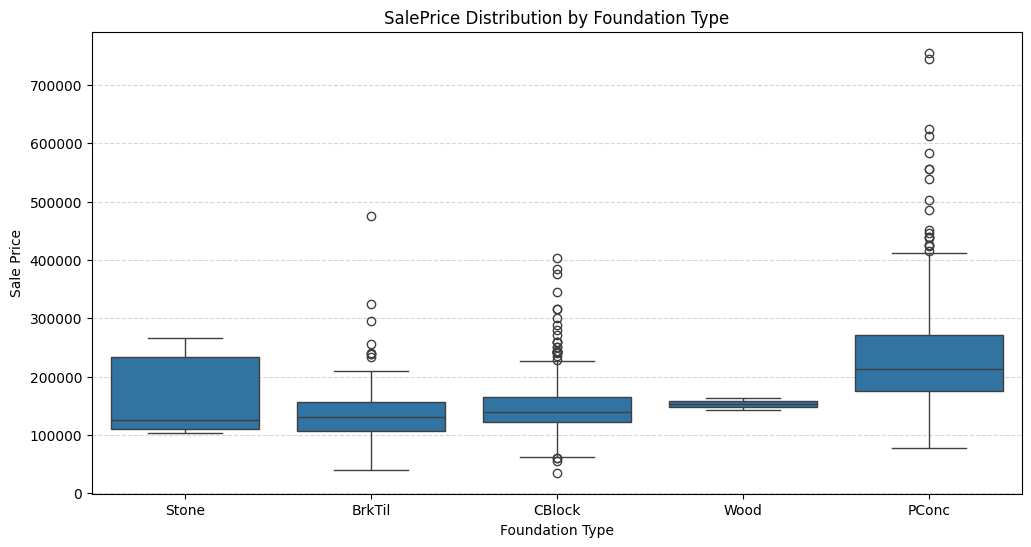

In [41]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 6))
# Order by median price for better readability
order = df.groupby('Foundation')['SalePrice'].median().sort_values().index
sns.boxplot(x='Foundation', y='SalePrice', data=df, order=order)
plt.title('SalePrice Distribution by Foundation Type')
plt.xlabel('Foundation Type')
plt.ylabel('Sale Price')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

**Visualization Check**
The boxplot clearly shows visible differences in median sale prices across foundation types. Specifically, homes with Poured Concrete (PConc) foundations appear to have a substantially higher median price compared to those with Cinder Block (CBlock) or Brick & Tile (BrkTil) foundations. The spread (interquartile range) and presence of outliers also vary by group, supporting the decision to use a rank-based non-parametric test.

In [43]:

# Extract SalePrice arrays for each unique foundation type
groups = [df[df['Foundation'] == f]['SalePrice'] for f in df['Foundation'].unique()]

# We use Kruskal-Wallis because we are comparing MEDIANS of >2 groups
# and assuming non-normality is safer for prices
stat, p_val = stats.kruskal(*groups)

print("\n" + "="*50)
print("Kruskal-Wallis Test Results")
print("="*50)
print(f"H-statistic: {stat:.4f}")
print(f"p-value:     {p_val:.4g}")

alpha = 0.05
if p_val < alpha:
    print("\nResult: REJECT H0.")
    print("There is a statistically significant difference in median SalePrice")
    print("among the different foundation types.")
else:
    print("\nResult: FAIL TO REJECT H0.")
    print("No significant difference in median SalePrice found among groups.")



Kruskal-Wallis Test Results
H-statistic: 397.2436
p-value:     1.096e-84

Result: REJECT H0.
There is a statistically significant difference in median SalePrice
among the different foundation types.


#### Conclusion
The Kruskal-Wallis H test resulted in a highly significant H-statistic of **397.24** and a p-value of approximately **1.096e-84**.

Since the p-value is essentially zero (far less than 0.05), we **reject the null hypothesis**. This provides overwhelming statistical evidence that the median sale prices differ significantly across the various foundation types (e.g., Poured Concrete vs. Cinder Block). The visual evidence from the boxplots, combined with this test result, confirms that foundation type is a strong discriminator of property value in the Ames housing market.

### 12. To what extent can we build a robust predictive model for house prices in Ames that remains statistically valid across neighborhoods, housing styles, and economic conditions?
This task investigates the generalizability and robustness of our predictive model. Specifically, we want to determine if the relationships between key predictors (like GrLivArea or OverallQual) and SalePrice are consistent across different subgroups (such as Neighborhood), or if they vary significantly (a phenomenon known as interaction or moderation).

### a: How do key predictors (e.g., GrLivArea, OverallQual, YearBuilt) interact with categorical variables like Neighborhood?
We begin by visualizing the relationship between SalePrice and GrLivArea across all neighborhoods.
- FacetGrid Regression: We will plot separate regression lines for every neighborhood to visually compare their slopes. Steeper slopes indicate that size adds more value in that specific area
- Correlation Heatmap: We will calculate the correlation coefficient between size and price for each neighborhood and display it as a sorted heatmap. This provides a clear, quantitative summary of how the strength of the relationship varies by location

In [ ]:
df = df_final.copy()

# FacetGrid: Regression lines for all neighborhoods
# This allows us to see the slope and spread for every subgroup
g = sns.lmplot(x='GrLivArea', y='SalePrice', col='Neighborhood', data=df, 
               col_wrap=5, height=2, aspect=1, 
               line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3, 's': 10})
g.fig.suptitle('Regression Slopes: GrLivArea vs SalePrice by Neighborhood', y=1.02)
plt.show()

# Correlation Heatmap
# Calculate correlation between GrLivArea and SalePrice per Neighborhood
neighborhood_corrs = df.groupby('Neighborhood')[['GrLivArea', 'SalePrice']].apply(
    lambda x: x['GrLivArea'].corr(x['SalePrice'])
).sort_values(ascending=False)

plt.figure(figsize=(3, 4))
sns.heatmap(neighborhood_corrs.to_frame(name='Correlation (r)'), 
            annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.2f')
plt.title('Strength of Relationship (Size vs Price)\nby Neighborhood')
plt.tight_layout()
plt.show()


### b: Do the relationships (slopes) between predictors and SalePrice vary significantly across subgroups (i.e., is there interaction or moderation)

### c: Can we statistically demonstrate model generalizability using cross-validation and nested F-tests between hierarchical models (e.g., base model vs. model with interactions)